## Importing required liberaries

In [1]:
## pip install scikit-learn
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Generate the synthetic data for 100 students

In [2]:
np.random.seed(42)
n_students = 100

study_hours = np.random.uniform(0, 10, n_students)

In [3]:
study_hours

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456,
       9.69584628, 7.75132823, 9.39498942, 8.9482735 , 5.97899979,
       9.21874235, 0.88492502, 1.95982862, 0.45227289, 3.25330331,
       3.8867729 , 2.71349032, 8.28737509, 3.56753327, 2.8093451 ,
       5.42696083, 1.40924225, 8.02196981, 0.74550644, 9.86886937,
       7.72244769, 1.98715682, 0.05522117, 8.15461428, 7.06857

## Calculate the marks by defining the slope, intercept and noise

In [4]:
true_slope = 7 # defining m
true_intercept = 390 # defining intercept

noise = np.random.normal(0, 5, n_students)


marks = true_slope * study_hours + true_intercept + noise

In [5]:
marks


array([416.65304366, 455.0549647 , 441.69837981, 421.96824932,
       399.82294539, 402.70517928, 401.45532308, 448.04097911,
       428.03558281, 437.05629523, 396.01792519, 459.5374452 ,
       445.62218384, 407.43007491, 403.21313545, 407.68154064,
       407.78669154, 425.09463948, 418.27561054, 403.06846507,
       434.31030402, 401.06984661, 410.47569268, 414.47239336,
       414.84804518, 442.85909068, 402.26359217, 421.98502434,
       430.66259126, 395.27178317, 441.95906914, 402.80957772,
       395.84136346, 456.04975803, 448.00038624, 446.45524499,
       411.62411489, 409.15325854, 436.93450703, 422.31841127,
       398.36911759, 418.81899352, 398.12131055, 457.41209331,
       412.06975845, 431.82962263, 418.83374688, 419.39550617,
       431.20400502, 413.89209002, 452.91824232, 441.42780899,
       456.26318273, 450.12053626, 424.09968136, 454.87401133,
       390.88295658, 406.08676252, 388.56878905, 420.52279518,
       413.29114382, 407.38412464, 452.07921173, 408.81

## clip the mark so that it is between 0 and 100

##

In [6]:
regression_df = pd.DataFrame({'Study_hours': study_hours, 'Marks': marks})

In [7]:
regression_df.head()

,Study_hours,Marks
0,3.745401,416.653044
1,9.507143,455.054965
2,7.319939,441.698380
3,5.986585,421.968249
4,1.560186,399.822945


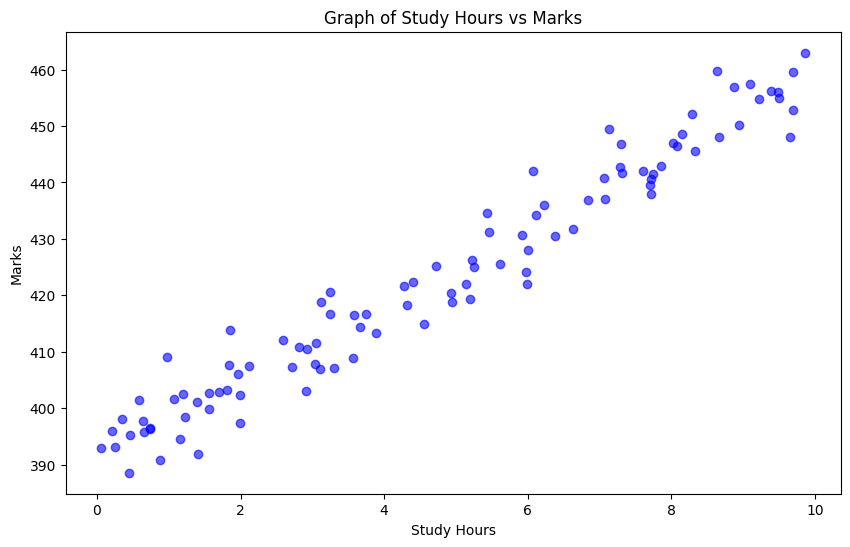

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(study_hours,marks, color = 'blue' , alpha = 0.6)
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Graph of Study Hours vs Marks')
plt.show()

 ## Visualize the data

In [9]:
X = regression_df[['Study_hours']]
y = regression_df['Marks']

In [10]:
X.head()

,Study_hours
0,3.745401
1,9.507143
2,7.319939
3,5.986585
4,1.560186


In [11]:
y.head()

0    416.653044
1    455.054965
2    441.698380
3    421.968249
4    399.822945
Name: Marks, dtype: float64

In [12]:
print("Before split")
print("Study hours shape: ", {X.shape})
print("Marks shape: ", {y.shape})

Before split
Study hours shape:  {(100, 1)}
Marks shape:  {(100,)}


In [13]:
!pip install scikit-learn

## Split the data into training and testing (80% training and 20% testing)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Checking the shape after split

In [15]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (80,)
y_test shape: (20,)


##
create Train a Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
print(model.coef_[0])
print(model.intercept_)

6.799323657480276
390.7145665972928


##Make prediction on test data

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([395.03610454, 451.55677433, 443.22198789, 435.76160101,
       408.30985511, 420.64195923, 410.5784268 , 449.39976202,
       392.11417299, 416.1807615 , 420.08390644, 432.02350744,
       446.16042842, 455.23236541, 398.84616645, 401.32277893,
       443.15573374, 395.74910212, 447.31503601, 402.30905368])

In [20]:
y_test

83    397.731853
53    450.120536
70    437.872380
45    431.829623
44    412.069758
39    422.318411
22    410.475693
80    459.746112
10    396.017925
0     416.653044
18    418.275611
30    441.959069
73    448.567223
33    456.049758
90    402.481898
4     399.822945
76    440.588801
77    396.344394
12    445.622184
31    402.809578
Name: Marks, dtype: float64

In [21]:
compare = pd.DataFrame({'Actual value': y_test, 'Predicted Value': y_pred})
compare

,Actual value,Predicted Value
83,397.731853,395.036105
53,450.120536,451.556774
70,437.872380,443.221988
45,431.829623,435.761601
44,412.069758,408.309855
39,422.318411,420.641959
22,410.475693,410.578427
80,459.746112,449.399762
10,396.017925,392.114173
0,416.653044,416.180762


## Evaluate the model

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


## Display the result

In [23]:
print(f"Model coefficient (model learned): {model.coef_[0]:.2f}")
print(f"Model intercept (model learned): {model.intercept_:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Model coefficient (model learned): 6.80
Model intercept (model learned): 390.71
Mean Squared Error: 16.34
R-squared (R2) Score: 0.96


## Visualize the regression line

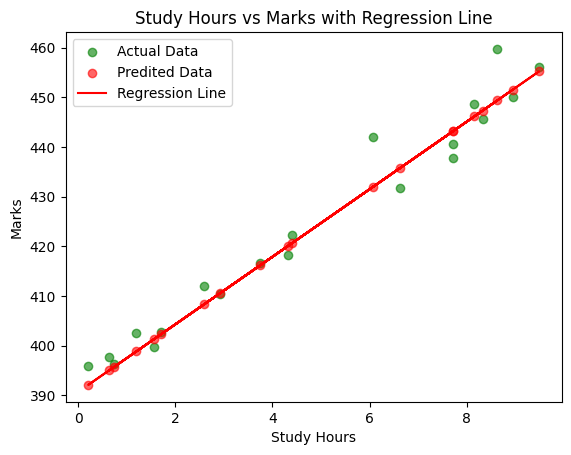

In [24]:
plt.scatter(X_test, y_test, color = 'green', alpha = 0.6, label = 'Actual Data')
plt.scatter(X_test, y_pred, color = 'red', alpha = 0.6, label = 'Predited Data')
plt.plot(X_test,y_pred, color = 'red', label = 'Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Study Hours vs Marks with Regression Line')
plt.legend()

In [25]:
X_test

,Study_hours
83,0.635584
53,8.948274
70,7.722448
45,6.625223
44,2.587800
39,4.401525
22,2.921446
80,8.631034
10,0.205845
0,3.745401


## mAKE PREICTION FOR NEW DATA

In [26]:
new_study_hours = 6.5
predicted_marks = model.predict([[new_study_hours]])

f:\AI_ML_classes\mlenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print(f"If a student studies for {new_study_hours} hours, then his/her predicted mark is {predicted_marks[0]:.2f}")

If a student studies for 6.5 hours, then his/her predicted mark is 434.91
